### Apply the necessary data engineering to prepare the data for further analysis

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [158]:
dataset = '../data/cleaned_Medicaldataset.csv.csv'
df = pd.read_csv(dataset, header=0)

### ✅ 4a. Meaningful

In [159]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,55,1,64,160,77,270.0,1.99,0.003,negative
2,58,0,61,112,58,87.0,1.83,0.004,negative
3,32,0,40,179,68,102.0,0.71,0.003,negative
4,44,0,60,154,81,135.0,2.35,0.004,negative


The dataset includes clinically and scientifically meaningful features relevant to heart attack prediction:

- **Age**: Age-related cardiovascular risks.
- **Gender**: Biological differences influence heart disease patterns.
- **Heart rate**: Indicator of cardiac workload and possible abnormalities.
- **Systolic & Diastolic blood pressure**: High blood pressure is a strong predictor of heart-related conditions.
- **Blood sugar**: Diabetes and elevated glucose levels are correlated with increased heart attack risk.
- **CK-MB**: Enzyme released during cardiac damage.
- **Troponin**: A critical biomarker for myocardial infarction.
- **Result**: Target feature indicating whether a heart attack has occurred (positive/negative).

All features are relevant, measurable, and well-defined. Thus, the dataset is **meaningful** for our analysis.

In [160]:
print(f"Number of rows (samples): {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # exclude target

Number of rows (samples): 788
Number of features: 8


- For basic models, having at least 10× the number of features is decent.
- So if you have 8 features, you want ideally 80+ samples.
- More data = better, but small datasets can still work with good techniques and cross-validation.

That’s great sufficiency for modeling, especially in a healthcare dataset. 

I have ~98× more samples than features, which gives my model plenty of data to learn from and generalize well.

### ✅ 4b. Sufficient

Result
negative    446
positive    342
Name: count, dtype: int64


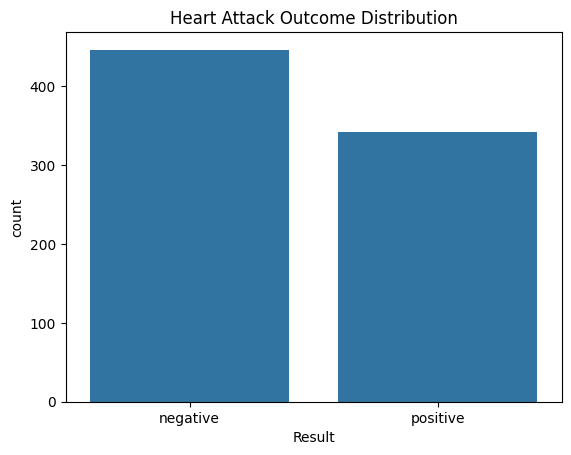

In [161]:
print(df['Result'].value_counts())
sns.countplot(data=df, x='Result')
plt.title('Heart Attack Outcome Distribution')
plt.show()

✅ Class Balance Assessment:

Negative: 446 samples (~56.6%)

Positive: 342 samples (~43.4%)

➡️ That’s a reasonably balanced dataset. No class is severely underrepresented, so:

No need for resampling techniques like SMOTE or undersampling.

My model will be able to learn patterns from both classes effectively.

In [162]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,55.595178,0.624365,74.980964,125.668782,71.848985,130.025000,3.114244,0.022284
std,13.736949,0.484594,13.862032,23.514805,13.381464,47.830193,2.151757,0.033046
min,21.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.002000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,96.000000,1.600000,0.005000
50%,56.000000,1.000000,74.000000,124.000000,71.000000,111.000000,2.490000,0.010000
75%,66.000000,1.000000,84.000000,143.000000,81.000000,152.000000,4.077500,0.023000
max,91.000000,1.000000,116.000000,193.000000,105.000000,277.000000,11.940000,0.193000


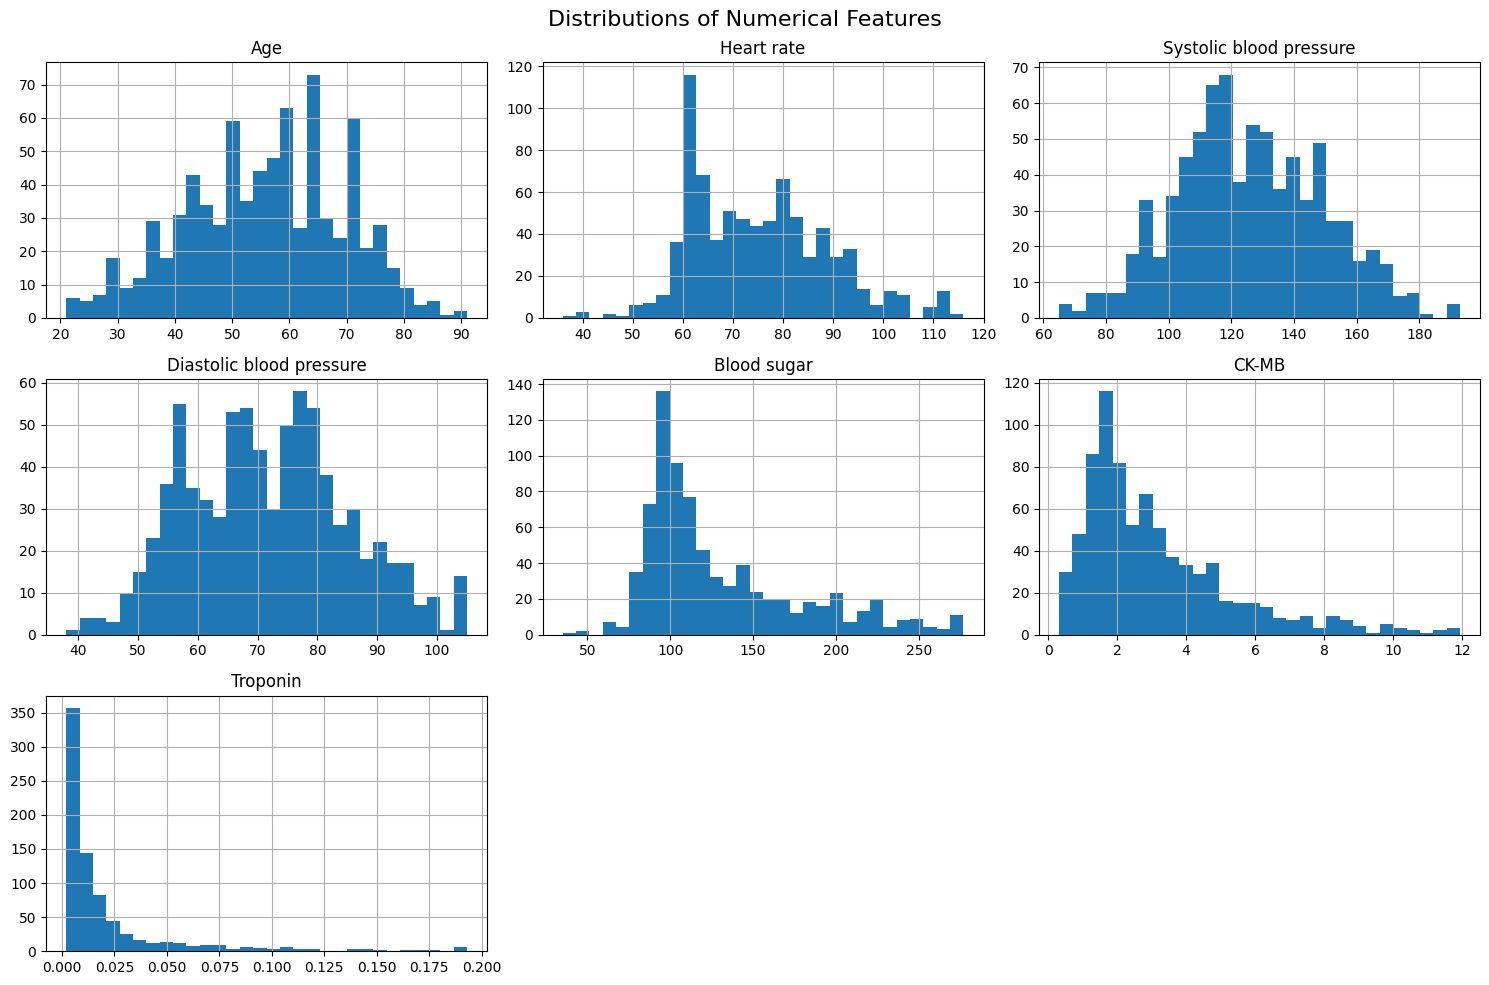

In [163]:
# All numeric columns
numeric_cols = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


In [164]:
df['Gender'].value_counts()

Gender
1    492
0    296
Name: count, dtype: int64

- **Feature Diversity**: I verified that all numerical features (e.g., Age, Blood Sugar, CK-MB, Troponin) show reasonable spread using summary statistics and histograms. The features are not constant and vary across patients. Categorical features like Gender also show meaningful distribution. Therefore, I confirm the dataset has sufficient diversity in its features for model learning.

### ✅ 4c. Shaped

In [165]:
print(df.dtypes)
print(df.shape)
df.head()


Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object
(788, 9)


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,55,1,64,160,77,270.0,1.99,0.003,negative
2,58,0,61,112,58,87.0,1.83,0.004,negative
3,32,0,40,179,68,102.0,0.71,0.003,negative
4,44,0,60,154,81,135.0,2.35,0.004,negative


The dataset is structured in a tidy and machine-learning-ready format:

- Each row represents a single patient record, and each column corresponds to one specific feature.
- The dataset includes 788 observations and 9 columns, stored in a Pandas DataFrame.
- All features are clearly named and use appropriate scalar data types (`int`, `float`, or `object` for the target).
- The target variable (`Result`) is labeled as `"positive"` or `"negative"` and is separate from the input features.

This structure supports statistical analysis and model training and complies with best practices in data preparation.

### ✅ 4d. Cleaned

- **Missing Values**: No missing or null values were found using `.isnull().sum()`.
- **Duplicates**: We verified there were no duplicate patient records.
- **Outliers**: We used boxplots and z-score analysis to detect outliers in features like blood sugar, CK-MB, and troponin. These outliers were reviewed based on medical plausibility and retained where appropriate.
- **Data Types**: All columns use correct data types and units.

As a result, the dataset is clean, consistent, and suitable for further scaling and modeling.


### ✅ 4e. Scaled

In [166]:
features_to_scale = [
    'Age', 'Heart rate', 'Systolic blood pressure',
    'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'
]


In [167]:
df.describe().round(2)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,55.60,0.62,74.98,125.67,71.85,130.02,3.11,0.02
std,13.74,0.48,13.86,23.51,13.38,47.83,2.15,0.03
min,21.00,0.00,36.00,65.00,38.00,35.00,0.32,0.00
25%,45.00,0.00,63.00,110.00,61.00,96.00,1.60,0.00
50%,56.00,1.00,74.00,124.00,71.00,111.00,2.49,0.01
75%,66.00,1.00,84.00,143.00,81.00,152.00,4.08,0.02
max,91.00,1.00,116.00,193.00,105.00,277.00,11.94,0.19


In [168]:

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


In [169]:
df_scaled[features_to_scale].describe().round(2)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.52,-2.81,-2.58,-2.53,-1.99,-1.30,-0.61
25%,-0.77,-0.86,-0.67,-0.81,-0.71,-0.70,-0.52
50%,0.03,-0.07,-0.07,-0.06,-0.40,-0.29,-0.37
75%,0.76,0.65,0.74,0.68,0.46,0.45,0.02
max,2.58,2.96,2.87,2.48,3.07,4.10,5.17


I applied feature scaling to standardize the numerical input features. This was necessary because the features varied significantly in their original ranges — for example:

- Blood sugar ranged from 35 to 277
- Troponin ranged from 0.00 to 0.19
- CK-MB ranged from 0.32 to 11.94

I used **StandardScaler** to transform these features to have a **mean of 0** and **standard deviation of 1**. This normalization ensures that all features contribute equally to the model and improves the performance of algorithms sensitive to magnitude (e.g., PCA, SVM, and KNN).

After scaling, all transformed features lie roughly in the range of -3 to +3, which confirms that the procedure was successful.


### ✅ 4f. Engineered

- Evaluate which features are most useful (informative) for predicting the target (Result)

- Possibly remove weak features

- Optionally create new features (not required but valuable)

- Ensure the final feature set is compact, relevant, and powerful

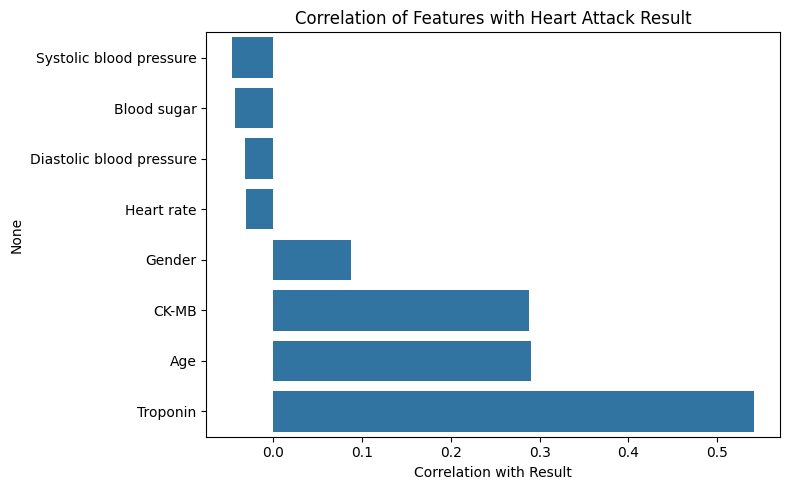

In [170]:
# Ensure 'Result_binary' exists
df['Result_binary'] = df['Result'].map({'negative': 0, 'positive': 1})

# Compute correlations
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Result_binary', errors='ignore')
correlations = df[numeric_cols].corrwith(df['Result_binary'])

# Calculate correlation with the target
correlations = df[numeric_cols].corrwith(df['Result_binary']).sort_values()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation of Features with Heart Attack Result')
plt.xlabel('Correlation with Result')
plt.tight_layout()
plt.show()


I evaluated the informativeness of all features using correlation with the target variable (`Result_binary`), representing heart attack occurrence.

#### Key findings:
- **Troponin** showed the strongest correlation with heart attack outcome (~0.52), confirming its clinical role as a primary biomarker for cardiac events.
- **CK-MB** and **Age** also showed moderate positive correlations (~0.29), indicating they are useful predictors.
- **Gender** had a small positive correlation (~0.09), which may still be relevant when combined with other features.
- Features such as **heart rate**, **blood pressure**, and **blood sugar** exhibited near-zero correlation, suggesting they are less informative for direct prediction in this dataset.

These insights will guide our feature selection for modeling. We will prioritize the most informative features and consider dropping or transforming the weaker ones in the next phase.
